<a href="https://colab.research.google.com/github/netobrandao/Pareto/blob/main/Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grafico de Pareto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
#Carregando os datasets

data = pd.read_csv('https://raw.githubusercontent.com/netobrandao/Pareto/main/fOrdemProducaoLancamento.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/netobrandao/Pareto/main/dOcorrencia.csv')

In [ ]:
data.head()

,ID_OP,ID_Operador,ID_Ocorrencia,ID_Recurso,DataHoraInicial,DataHoraFinal,QtdeProduzida,QtdeRefugada,DifHoras
0,39633,1475,51.0,NaN,21/01/2020 07:45:56,21/01/2020 08:21:08,0,0,"0,586666666727979"
1,39633,1467,61.0,NaN,21/01/2020 08:20:56,21/01/2020 08:26:19,0,0,"0,0897222220664844"
2,39633,1475,NaN,PF-04,21/01/2020 08:25:56,21/01/2020 10:31:33,306,0,"2,09361111104954"
3,39780,1338,51.0,SA,21/01/2020 13:00:00,21/01/2020 13:05:45,0,0,"0,09583333338378"
4,39780,477,61.0,SA,21/01/2020 13:05:00,21/01/2020 13:10:19,0,0,"0,0886111110448837"


In [ ]:
data2

,ID_Ocorrencia,Ocorrencia,Tipo
0,1,Falha na Operação,REJ
1,2,Peça Batida / danificada,REJ
2,3,Banho Irregular,REJ
3,4,Matéria Prima Irregular,REJ
4,5,Dimensional,REJ
...,...,...,...
20,51,Preparação de Máquina,PAR
21,52,Ajuste de Máquina,PAR
22,61,Controle de Qualidade,PAR
23,71,Engenharia,PAR


In [ ]:
#Verificando como estão os tipos de variaveis
data.dtypes

ID_OP                int64
ID_Operador          int64
ID_Ocorrencia      float64
ID_Recurso          object
DataHoraInicial     object
DataHoraFinal       object
QtdeProduzida       object
QtdeRefugada         int64
DifHoras            object
dtype: object

In [ ]:
data2.dtypes

ID_Ocorrencia     int64
Ocorrencia       object
Tipo             object
dtype: object

In [ ]:
#convertendo a variavel 'ID_Ocorrencia' de data2 para o tipo string 
data2['ID_Ocorrencia'] = data2['ID_Ocorrencia'].astype(str)
data2

,ID_Ocorrencia,Ocorrencia,Tipo
0,1,Falha na Operação,REJ
1,2,Peça Batida / danificada,REJ
2,3,Banho Irregular,REJ
3,4,Matéria Prima Irregular,REJ
4,5,Dimensional,REJ
...,...,...,...
20,51,Preparação de Máquina,PAR
21,52,Ajuste de Máquina,PAR
22,61,Controle de Qualidade,PAR
23,71,Engenharia,PAR


In [ ]:
#Tabela de Frequencia

#1 Criando tabela de frequencia
pareto = pd.DataFrame(data['ID_Ocorrencia'].value_counts()).reset_index()

#2 Renomeando colunas
pareto.rename(columns={'index':'ID_Ocorrencia','ID_Ocorrencia':'Frequencia'},inplace=True)

#3 Convertendo as variaveis de 'ID_Ocorrencia' para o tipo string
pareto['ID_Ocorrencia'] = pareto['ID_Ocorrencia'].astype(int)
pareto['ID_Ocorrencia'] = pareto['ID_Ocorrencia'].astype(str)

#4 Calculo do percentual de cada ocorrencia e do percentual acumulado
pareto['Percentual'] = (pareto['Frequencia'] / pareto['Frequencia'].sum())*100
pareto['PercentualAcumulado'] = pareto['Percentual'].cumsum()

#5 Rotulando os codigos de ocorrencia para melhor vizualização
pareto = pareto.merge(data2,how="left")
pareto

,ID_Ocorrencia,Frequencia,Percentual,PercentualAcumulado,Ocorrencia,Tipo
0,61,1988,43.653931,43.653931,Controle de Qualidade,PAR
1,51,1884,41.370224,85.024155,Preparação de Máquina,PAR
2,9,127,2.788757,87.812912,Falha do Operador,REJ
3,4,88,1.932367,89.745279,Matéria Prima Irregular,REJ
4,32,81,1.778656,91.523935,Manutenção Mecânica,REJ
...,...,...,...,...,...,...
14,2,14,0.307422,99.802372,Peça Batida / danificada,REJ
15,52,3,0.065876,99.868248,Ajuste de Máquina,PAR
16,7,2,0.043917,99.912165,Alteração / Erro Projeto,REJ
17,3,2,0.043917,99.956083,Banho Irregular,REJ


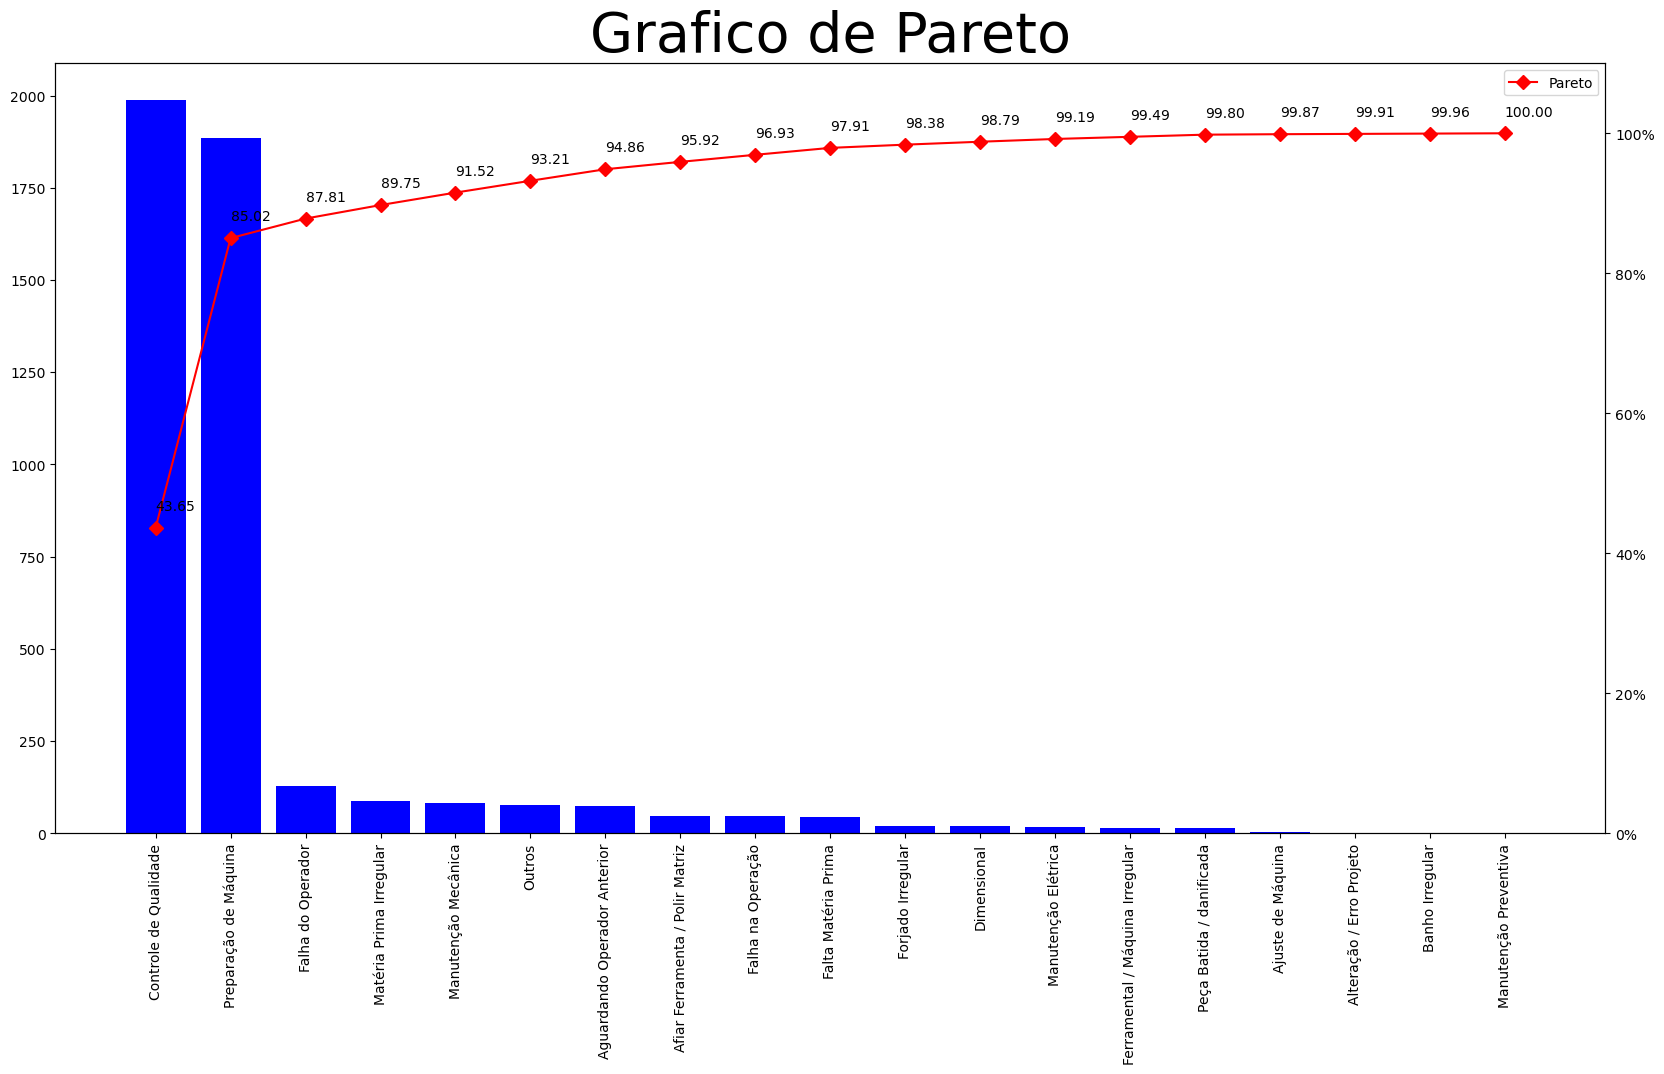

In [ ]:
#formato1 matplotlib
fig,ax = plt.subplots(figsize=(20,10))
#1 Criar Grafico de barras
ax.bar(pareto['ID_Ocorrencia'],pareto['Frequencia'],color='Blue')
ax.set_title("Grafico de Pareto",fontsize=40)
ax.tick_params(axis="y", colors="black")

#2 Metodo para colocar o grafico de linha junto com o grafico de barras
ax2 = ax.twinx()

#3 Criar grafico de linha
ax2.plot(pareto['Ocorrencia'],pareto['PercentualAcumulado'],color = 'red',marker='D',ms=7,label='Pareto')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="black")
ax2.set_ylim([0,110])

#4 Rotacionar labels do eixo X para facil leitura
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#5 Inserir valores no grafico de linha
gap = 2.5
for i in range(len(pareto['PercentualAcumulado'])):
    ax2.annotate("%.2f" % pareto['PercentualAcumulado'][i], (pareto["Ocorrencia"][i], pareto['PercentualAcumulado'][i] + gap))
plt.legend()
plt.show()